In [92]:
'''
PRESSUPOSTOS DA REGRESSÃO LINEAR:

########## 
1-LINEARIDADE
A VARIAVEL RESPOSTA É LINEAR COM A VARIAVEL PREDITORA? NUM GRAFICO DE RETA AMBAS FICAM
PRÓXIMAS VISUALMENTE?

R: Este pressuposto não está sendo atendido, porque além de não possuir uma reta visualmente clara, 
os residuos estão distribuidos de forma organizada em alguns pontos, indicando algum padrão nos residuos.


########## 
2-INDEPENDENCIA DOS RESIDUOS, OS ERROS/RESIDUOS SÃO INDEPENDENTES ENTRE SI ? PORQUE SE TIVER ALGUM FATO 
QUE MUDE O COMPORTAMENTO DOS DADOS, OS ERROS ENTÃO PODEM ESTAR INFLUENCIADOS.
        
        Durbin watson responde a essa questão, pois durbin Watson varia de 0 a 4
        se durbin Watson próximo de 2 não há correlação (AQUI É O OBJETIVO)

        Se Durbin Watson <2 correlação positiva
        Neste caso, os resíduos sucessivos tendem a ter valores semelhantes.
        Exemplo: se um resíduo é positivo, o próximo também tem alta probabilidade de ser positivo.
        indica que o modelo pode não estar capturando adequadamente a relação entre variáveis ou 
        que há omissão de alguma variável importante.

        Se Durbin Watson >2 correlação negativa
        Neste caso, os resíduos sucessivos têm uma tendência a oscilar.
        Exemplo: se um resíduo é positivo, o próximo tende a ser negativo.
        Problemas potenciais: pode indicar instabilidade ou má especificação do modelo, 
        o que exige revisão do modelo.

R: O modelo está com correlação positiva, pois tem resultado 0,222 em Durbin-Watson e visualmente ao 
verificarmos o gráfico de RESIDUOS VERSUS A ORDEM (MÊS) temos muita alternância nos residuos, muitos altos e baixos.

########## 
3-HOMOCEDASTICIDADE / IGUALDADE DAS VARIANCIAS
A VARIANCIA É IGUAL AO LONGO DA BASE DE DADOS ?  PORQUE DEVE HAVER DISPERSÃO 
NOS DADOS, SEM PADRÕES OU CLUSTERS.

R: Este pressuposto não está sendo atendido, pois os residuos estão distribuidos de forma organizada 
em alguns pontos, indicando algum padrão. 
Isso se chama heterocedasticidade, o oposto da homocedasticidade, que seria nosso objetivo.


########## 
4- NORMALIDADE DOS RESIDUOS
O ERRO É NORMALMENTE DISTRUIDO? SE EU PLOTAR UM GRÁFICO ELE FICA PARECIDO COM UM SINO ?

        Para responder essa questão devemos analisar 3 situações (GRÁFICO, TESTE OMNIBUS e TESTE JARQUE-BERA)

        NO GRÁFICO: Visualmente a maioria dos resíduos está perto de 0 (pequenos desvios entre o 
        valor observado e o previsto), tendo poucos resíduos muito positivos ou negativos

        NO TESTE OMNIBUS: p>0.05 não há evidência suficiente para rejeitar a normalidade, ou seja esta ok. Mas se
        p≤0.05 então rejeitamos a normalidade dos resíduos (pode haver problemas).

        NO TESTE DE JARQUE-BERA: p>0.05 não há evidência suficiente para rejeitar a normalidade, ou seja esta ok. Mas se
        p≤0.05 então rejeitamos a normalidade dos resíduos (pode haver problemas).


R: Este pressuposto não está sendo atendido em nenhuma das analises, OMNIBUS = 10.654, JARQUE-BERA = 8.764 e 
visualmente o gráfico não se parece com um sino.
'''

'\nPRESSUPOSTOS DA REGRESSÃO LINEAR:\n\n########## \n1-LINEARIDADE\nA VARIAVEL RESPOSTA É LINEAR COM A VARIAVEL PREDITORA? NUM GRAFICO DE RETA AMBAS FICAM\nPRÓXIMAS VISUALMENTE?\n\nR: Este pressuposto não está sendo atendido, porque além de não possuir uma reta visualmente clara, \nos residuos estão distribuidos de forma organizada em alguns pontos, indicando algum padrão nos residuos.\n\n\n########## \n2-INDEPENDENCIA DOS RESIDUOS, OS ERROS/RESIDUOS SÃO INDEPENDENTES ENTRE SI ? PORQUE SE TIVER ALGUM FATO \nQUE MUDE O COMPORTAMENTO DOS DADOS, OS ERROS ENTÃO PODEM ESTAR INFLUENCIADOS.\n        \n        Durbin watson responde a essa questão, pois durbin Watson varia de 0 a 4\n        se durbin Watson próximo de 2 não há correlação (AQUI É O OBJETIVO)\n\n        Se Durbin Watson <2 correlação positiva\n        Neste caso, os resíduos sucessivos tendem a ter valores semelhantes.\n        Exemplo: se um resíduo é positivo, o próximo também tem alta probabilidade de ser positivo.\n        i

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

pd.set_option('display.float_format', '{:.2f}'.format) #aqui estou padronizando as casas decimais para 2

###  DADOS DE TRANSPORTE DE PASSAGEIROS - COLHIDOS NO SITE OFICIAL DA SPTRANS

sptrans_arquivo = (r"C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/02-SPTRANS_PASSAGEIROS_CHUVA/01-INPUT/SPTRANS.csv")

sptrans = pd.read_csv(sptrans_arquivo, encoding='ANSI', sep=";")

df_transporte = sptrans.iloc[:,[0,-1]]
df_transporte = df_transporte.rename(columns={"TOT PASSAGEIROS TRANSPORTADOS":"QTD_PASSAGEIROS"})
df_transporte['QTD_PASSAGEIROS'] = df_transporte['QTD_PASSAGEIROS'].astype(int)

print("#######  -INFOS-  ##############")
print(df_transporte.info())
print("#######  -ESTATISTICAS-  ##############")
print(df_transporte.describe())
print("#######  -BASE-  ##############")
print(df_transporte)

#######  -INFOS-  ##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MÊS              96 non-null     object
 1   QTD_PASSAGEIROS  96 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB
None
#######  -ESTATISTICAS-  ##############
       QTD_PASSAGEIROS
count            96.00
mean      207484841.36
std        40385900.50
min       112113967.00
25%       173100664.75
50%       217407780.50
75%       242020789.75
max       262069342.00
#######  -BASE-  ##############
       MÊS  QTD_PASSAGEIROS
0   dez/23        169344196
1   nov/23        169267045
2   out/23        179184034
3   set/23        176996200
4   ago/23        191273935
..     ...              ...
91  mai/15        247975278
92  abr/15        240925285
93  mar/15        258355557
94  fev/15        214836388
95  jan/15        217543645

[96 rows x 2 c

In [94]:
###  DADOS DE CHUVA/PRECIPITAÇÃO DO MÊS - COLHIDOS NO SITE OFICIAL DA PREFEITURA, SECRETARIA DE URBANISMO

chuva_arquivo = (r"C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/02-SPTRANS_PASSAGEIROS_CHUVA/01-INPUT/PRECIPITACAO.csv")

chuva = pd.read_csv(chuva_arquivo, encoding='ANSI', sep=";")

df_chuva = chuva.iloc[:,[2,1]]
df_chuva = df_chuva.rename(columns={"MÉDIA_MENSAL":"PRECIPITACAO_MEDIA"})
df_chuva['PRECIPITACAO_MEDIA'] = df_chuva['PRECIPITACAO_MEDIA'].astype(int)

print("#######  -INFOS-  ##############")
print(df_chuva.info())
print("#######  -ESTATISTICAS-  ##############")
print(df_chuva.describe())
print("#######  -BASE-  ##############")
print(df_chuva)

#######  -INFOS-  ##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MÊS                 96 non-null     object
 1   PRECIPITACAO_MEDIA  96 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB
None
#######  -ESTATISTICAS-  ##############
       PRECIPITACAO_MEDIA
count               96.00
mean               134.03
std                105.65
min                  2.00
25%                 46.75
50%                113.50
75%                188.00
max                470.00
#######  -BASE-  ##############
       MÊS  PRECIPITACAO_MEDIA
0   jan/15                 262
1   fev/15                 283
2   mar/15                 204
3   abr/15                  50
4   mai/15                  58
..     ...                 ...
91  ago/23                  38
92  set/23                  83
93  out/23                 242
94

In [95]:
#########  DADOS DE CLIMA MÉDIO DO MÊS - COLHIDOS NO SITE OFICIAL DA PREFEITURA, SECRETARIA DE URBANISMO

caminho_df = (r"C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/02-SPTRANS_PASSAGEIROS_CHUVA/01-INPUT/CLIMA.csv")

clima = pd.read_csv(caminho_df, encoding='ANSI', sep=";")
df_clima = clima.iloc[:,[2,-3]]
df_clima = df_clima.rename(columns={"MÉDIA_MENSAL":"CLIMA_MEDIO"})
df_clima['CLIMA_MEDIO'] = df_clima['CLIMA_MEDIO'].astype(int)

print("#######  -INFOS-  ##############")
print(df_clima.info())
print("#######  -ESTATISTICAS-  ##############")
print(df_clima.describe())
print("#######  -BASE-  ##############")
print(df_clima)




#######  -INFOS-  ##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MÊS          96 non-null     object
 1   CLIMA_MEDIO  96 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB
None
#######  -ESTATISTICAS-  ##############
       CLIMA_MEDIO
count        96.00
mean         19.81
std           2.53
min          14.00
25%          18.00
50%          20.00
75%          22.00
max          25.00
#######  -BASE-  ##############
       MÊS  CLIMA_MEDIO
0   dez/23           23
1   nov/23           22
2   out/23           20
3   set/23           21
4   ago/23           18
..     ...          ...
91  mai/15           18
92  abr/15           20
93  mar/15           21
94  fev/15           23
95  jan/15           24

[96 rows x 2 columns]


In [96]:
# COMBINANDO OS DATAFRAMES - INNER JOIN

df_objetivo =  pd.merge(df_transporte,df_clima, left_on = 'MÊS', right_on = 'MÊS', how = 'inner')
df_objetivo =  pd.merge(df_objetivo,df_chuva, left_on = 'MÊS', right_on = 'MÊS', how = 'inner')
df_objetivo.loc[df_objetivo['MÊS'].isin(['dez/15','dez/16','dez/17','dez/18','dez/19','dez/21','dez/22','dez/23']),'PERIODO_FERIAS'] = 1
df_objetivo.loc[df_objetivo['MÊS'].isin(['jan/15','jan/16','jan/17','jan/18','jan/19','jan/21','jan/22','jan/23']),'PERIODO_FERIAS'] = 1
df_objetivo.loc[df_objetivo['MÊS'].isin(['jul/15','jul/16','jul/17','jul/18','jul/19','jul/21','jul/22','jul/23']),'PERIODO_FERIAS'] = 1
df_objetivo['PERIODO_FERIAS'].fillna(0,inplace=True)

print("#######  -INFOS-  ##############")
print(df_objetivo.info())
print("#######  -ESTATISTICAS-  ##############")
print(df_objetivo.describe())
print("#######  -BASE-  ##############")
print(df_objetivo)

#######  -INFOS-  ##############
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MÊS                 96 non-null     object 
 1   QTD_PASSAGEIROS     96 non-null     int32  
 2   CLIMA_MEDIO         96 non-null     int32  
 3   PRECIPITACAO_MEDIA  96 non-null     int32  
 4   PERIODO_FERIAS      96 non-null     float64
dtypes: float64(1), int32(3), object(1)
memory usage: 3.4+ KB
None
#######  -ESTATISTICAS-  ##############
       QTD_PASSAGEIROS  CLIMA_MEDIO  PRECIPITACAO_MEDIA  PERIODO_FERIAS
count            96.00        96.00               96.00           96.00
mean      207484841.36        19.81              134.03            0.25
std        40385900.50         2.53              105.65            0.44
min       112113967.00        14.00                2.00            0.00
25%       173100664.75        18.00               46.75

Text(0.5, 1.0, 'PRECIPITACAO_MEDIA')

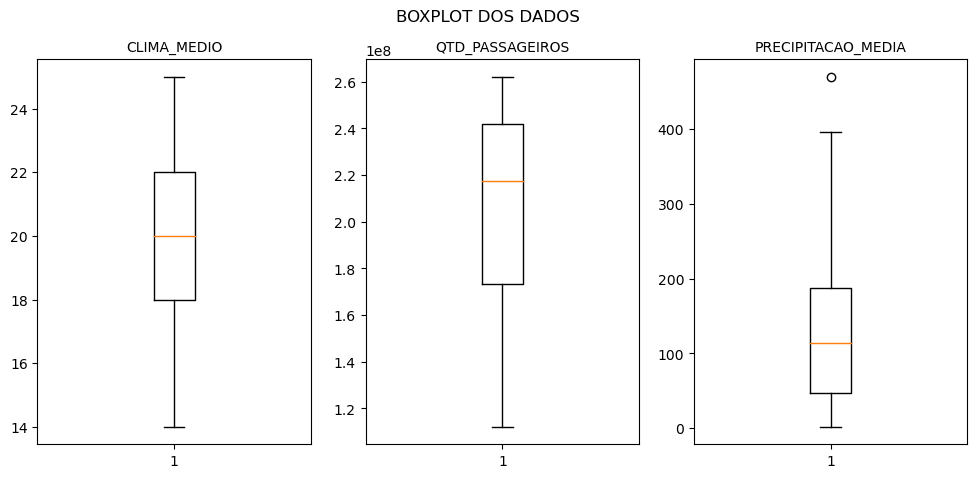

In [97]:
## VERIFICANDO O DATASET - BOXPLOT

'''
Aqui estamos verificando em ordem, e baixo para cima: o valor mínimo, o primeiro quartil, 
o segundo quatil (mediana), o terceiro quartil, o valor máximo e os outliers.
Em cada um dos BOXPLOT das variáveis.

A variável PERIODO_FERIAS não possui boxplot porque é binária
'''

figura= plt.figure(figsize=(12, 5))
figura.suptitle('BOXPLOT DOS DADOS', fontsize=(12))

figura.add_subplot(131)
plt.boxplot(df_objetivo['CLIMA_MEDIO'], showfliers=True)
#criando o boxplot e verificando os outliers
plt.title('CLIMA_MEDIO', fontsize=(10))


figura.add_subplot(132)
plt.boxplot(df_objetivo['QTD_PASSAGEIROS'], showfliers=True)
#criando o boxplot e verificando os outliers
plt.title('QTD_PASSAGEIROS', fontsize=(10))


figura.add_subplot(133)
plt.boxplot(df_objetivo['PRECIPITACAO_MEDIA'], showfliers=True)
#criando o boxplot e verificando os outliers
plt.title('PRECIPITACAO_MEDIA', fontsize=(10))


C:\Users\Guilh\AppData\Local\Temp\ipykernel_7484\3947447150.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_objetivo.corr(), cmap='viridis')


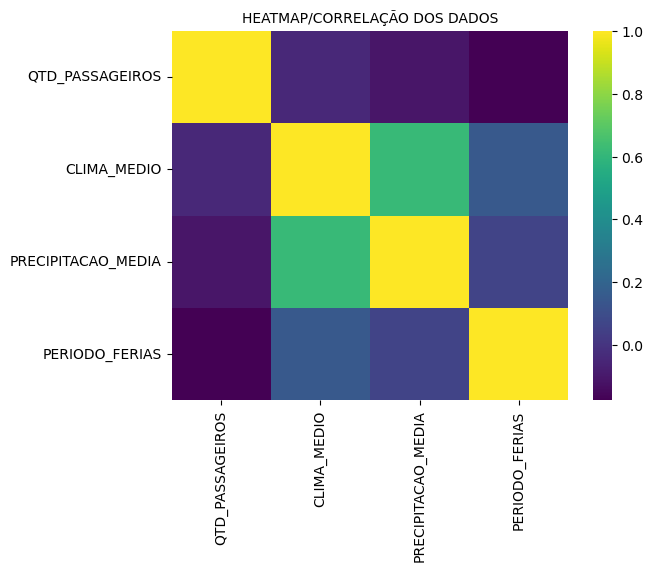

In [98]:
## HEATMAP

'''
Aqui estamos verificando a correalção entre as variáveis, percebe-se que Período de Férias tem uma 
boa correlação com Clima médio e Precipitação Média. Porém nenhuma delas tem correlação com a quantidade de passageiros.
'''


sns.heatmap(df_objetivo.corr(), cmap='viridis')
plt.title('HEATMAP/CORRELAÇÃO DOS DADOS', fontsize=(10))
plt.show()
#Paleta viridis é amigável para daltônicos

In [99]:
########### INICIO DO PROCESSO DE CRIAÇÃO DO MODELO
'''
FORMULA DA REGRESSAO MULTIPLA É 
y = a + B1*X1 + B2*X2
A = intercepto
B = inclinação da reta
y = variavel resposta
x = variavel preditora

##########
TESTE-F 
Se for menor que 0,05 o modelo é significativo  ||  se for maior que 0,05 modelo insignificante
No modelo somente com o intercepto, todos os valores ajustados são 
iguais à média da variável resposta. Portanto, se o valor-p do teste F global 
for significativo, seu modelo de regressão tem uma capacidade de previsão da variável 
resposta melhor que da média da resposta.

##########
TESTE-P (P-VALUE) 
Se for menor que 0,05 o coeficiente é significativo  ||  se for maior que 0,05 coeficiente ruim ....
as mudanças no valor do preditor estão relacionadas a mudanças na variável de resposta.

##########
R2
Se um modelo pudesse explicar 100% da variância (QUANTO UM DADO MUDA DO OUTRO), os valores ajustados sempre 
seriam iguais aos valores observados e, portanto, todos os pontos de dados cairiam na linha de regressão ajustada.
Independentemente do R-quadrado, os coeficientes significativos ainda representam a mudança 
média na resposta para uma unidade de mudança no preditor, então, o que fazer se você tem preditores significativos, 
mas um valor R-quadrado baixo? adicione mais variáveis ao modelo!
Use o R-quadrado ajustado para comparar modelos com diferentes números de preditores
Use o R-quadrado previsto para determinar o quão bem o modelo prevê novas observações e se o modelo é muito complicado
'''
##### CRIANDO O MODELO DE REGRESSÃO MULTIPLA

import statsmodels.formula.api as smf

print("#######  -CRIANDO MODELO COM STATSMODEL-  ##############")
modelo = smf.ols(formula='QTD_PASSAGEIROS ~ CLIMA_MEDIO + PRECIPITACAO_MEDIA + PERIODO_FERIAS', data=df_objetivo).fit()
print("#######  -RESULTADOS-  ##############")
print(modelo.summary())


#######  -CRIANDO MODELO COM STATSMODEL-  ##############
#######  -RESULTADOS-  ##############
                            OLS Regression Results                            
Dep. Variable:        QTD_PASSAGEIROS   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.389
Date:                Sat, 11 Jan 2025   Prob (F-statistic):              0.251
Time:                        21:02:23   Log-Likelihood:                -1814.9
No. Observations:                  96   AIC:                             3638.
Df Residuals:                      92   BIC:                             3648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

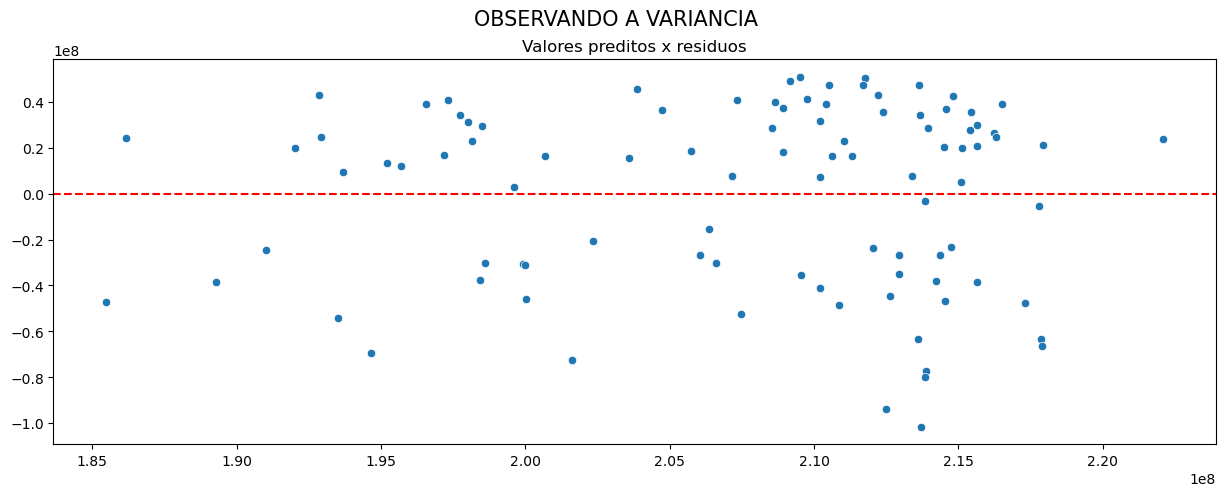

In [100]:
## VERIFICANDO PRESSUPOSTOS 1 E 3

'''
1-LINEARIDADE
A VARIAVEL RESPOSTA É LINEAR COM A VARIAVEL PREDITORA? NUM GRAFICO DE RETA AMBAS FICAM
PRÓXIMAS VISUALMENTE?

R: Este pressuposto não está sendo atendido, porque além de não possuir uma reta visualmente clara, 
os residuos estão distribuidos de forma organizada em alguns pontos, indicando algum padrão nos residuos.


3-HOMOCEDASTICIDADE / IGUALDADE DAS VARIANCIAS
A VARIANCIA É IGUAL AO LONGO DA BASE DE DADOS ?  PORQUE DEVE HAVER DISPERSÃO 
NOS DADOS, SEM PADRÕES OU CLUSTERS.

R: Este pressuposto não está sendo atendido, pois os residuos estão distribuidos de forma organizada 
em alguns pontos, indicando algum padrão. 
Isso se chama heterocedasticidade, o oposto da homocedasticidade, que seria nosso objetivo.
'''

figura= plt.figure(figsize=(15, 5))
figura.suptitle('OBSERVANDO A VARIANCIA', fontsize=(15))

sns.scatterplot(x=modelo.fittedvalues, y=modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Valores preditos x residuos')
plt.show()



plt.show()

#######  -RESULTADOS DO MODELO-  ##############
                            OLS Regression Results                            
Dep. Variable:        QTD_PASSAGEIROS   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.389
Date:                Sat, 11 Jan 2025   Prob (F-statistic):              0.251
Time:                        21:02:24   Log-Likelihood:                -1814.9
No. Observations:                  96   AIC:                             3638.
Df Residuals:                      92   BIC:                             3648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

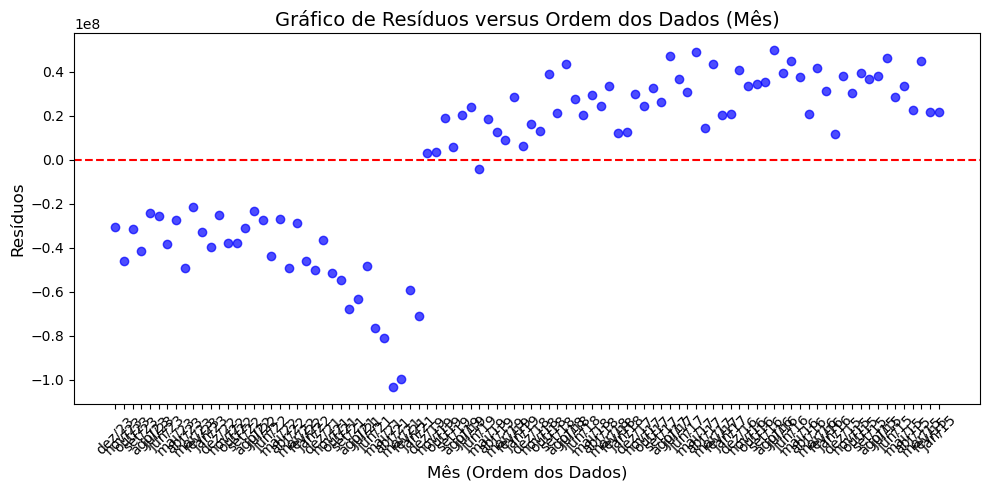

In [101]:
## RESIDUOS VERSUS ORDEM DOS DADOS
# AQUI ESTAMOS ANALISANDO O PRESSUPOSTO NÚMERO 2, PARA VERIFICAR SE EXISTE ALTOS E BAIXOS SUCESSIVOS
# DEVEMOS VERIFICAR O DURBIN WATSON EM CONJUNTO


'''
2-INDEPENDENCIA DOS RESIDUOS, OS ERROS/RESIDUOS SÃO INDEPENDENTES ENTRE SI ? PORQUE SE TIVER ALGUM FATO 
QUE MUDE O COMPORTAMENTO DOS DADOS, OS ERROS ENTÃO PODEM ESTAR INFLUENCIADOS.
        
        Durbin watson responde a essa questão, pois durbin Watson varia de 0 a 4
        se durbin Watson próximo de 2 não há correlação (AQUI É O OBJETIVO)

        Se Durbin Watson <2 correlação positiva
        Neste caso, os resíduos sucessivos tendem a ter valores semelhantes.
        Exemplo: se um resíduo é positivo, o próximo também tem alta probabilidade de ser positivo.
        indica que o modelo pode não estar capturando adequadamente a relação entre variáveis ou 
        que há omissão de alguma variável importante.

        Se Durbin Watson >2 correlação negativa
        Neste caso, os resíduos sucessivos têm uma tendência a oscilar.
        Exemplo: se um resíduo é positivo, o próximo tende a ser negativo.
        Problemas potenciais: pode indicar instabilidade ou má especificação do modelo, 
        o que exige revisão do modelo.

R: O modelo está com correlação positiva, pois tem resultado 0,222 em Durbin-Watson e visualmente ao 
verificarmos o gráfico de RESIDUOS VERSUS A ORDEM (MÊS) temos muita alternância nos residuos, muitos altos e baixos.
'''

print("#######  -RESULTADOS DO MODELO-  ##############")
print(modelo.summary())

## PLOTANDO GRÁFICO DE RESIDUOS VERSUS A ORDEM (MÊS)
plt.figure(figsize=(10, 5))
plt.scatter(df_objetivo['MÊS'], residuos, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Linha horizontal no zero
plt.xlabel('Mês (Ordem dos Dados)', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.title('Gráfico de Resíduos versus Ordem dos Dados (Mês)', fontsize=14)
plt.xticks(rotation=45)  # Rotação para os meses
plt.tight_layout()
plt.show()

#######  -RESULTADOS DO MODELO-  ##############
                            OLS Regression Results                            
Dep. Variable:        QTD_PASSAGEIROS   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.389
Date:                Sat, 11 Jan 2025   Prob (F-statistic):              0.251
Time:                        21:02:25   Log-Likelihood:                -1814.9
No. Observations:                  96   AIC:                             3638.
Df Residuals:                      92   BIC:                             3648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

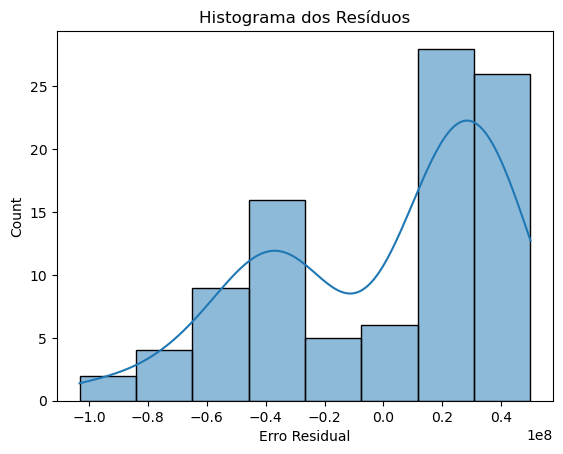

In [102]:
## VERIFICANDO PRESSUPOSTO 4

'''
4- NORMALIDADE DOS RESIDUOS
O ERRO É NORMALMENTE DISTRUIDO? SE EU PLOTAR UM GRÁFICO ELE FICA PARECIDO COM UM SINO ?

        Para responder essa questão devemos analisar 3 situações (GRÁFICO, TESTE OMNIBUS e TESTE JARQUE-BERA)

        NO GRÁFICO: Visualmente a maioria dos resíduos está perto de 0 (pequenos desvios entre o 
        valor observado e o previsto), tendo poucos resíduos muito positivos ou negativos

        NO TESTE OMNIBUS: p>0.05 não há evidência suficiente para rejeitar a normalidade, ou seja esta ok. Mas se
        p≤0.05 então rejeitamos a normalidade dos resíduos (pode haver problemas).

        NO TESTE DE JARQUE-BERA: p>0.05 não há evidência suficiente para rejeitar a normalidade, ou seja esta ok. Mas se
        p≤0.05 então rejeitamos a normalidade dos resíduos (pode haver problemas).


R: Este pressuposto não está sendo atendido em nenhuma das analises, OMNIBUS = 10.654, JARQUE-BERA = 8.764 e 
visualmente o gráfico não se parece com um sino.
'''

print("#######  -RESULTADOS DO MODELO-  ##############")
print(modelo.summary())

## GRÁFICO COM A NORMALIDADE DOS RESIDUOS
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Erro Residual')
plt.show()
